<a href="https://colab.research.google.com/github/Javier9898/Limpieza_y_Vizualisacion_de_Datos_de_la_UFC/blob/master/An%C3%A1lisis_y_visualizaci%C3%B3n_de_Datos_de_la_UFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Visualización de Datos del Top 10 Con Más Victorias en la UFC

## El objetivo de este análisis es obtener información interesante del conjunto de datos obtenidos de la UFC

## Se busca responder las siguientes preguntas:
1. ¿Quienes conforman el top 10 con más victorias en la UFC?
2. ¿Como pelean los peleadores que conforman este top 10?
3. ¿Cual es el promedio de rondas por peleador en este top 10?
4. ¿Que peleador en la historia de la UFC ha disputado la mayor cantidad de peleas por titulo?

### Importando librerias para la manipluación y vizualisación de datos

In [ ]:
# librerias para manipular datos
import pandas as pd
import numpy as np

# librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# librerias para contar el numero de ocurrencias en una lista
from collections import Counter

pd.options.display.max_columns = 150

### Importando datos

In [ ]:
data = pd.read_csv("data.csv")
data.head(2)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.2,6.0,0.2,0.0,62.6,20.6,2.6,2.0,48.6,11.2,0.8,7.6,5.4,0.4,0.0,65.4,22.6,0.466,0.4,0.8,0.2,0.100,66.4,23.6,4.0,1.0,6.4,4.0,1.0,0.6,51.2,17.4,0.6,0.2,39.6,9.4,0.2,6.8,4.8,0.0,0.0,52.8,18.2,0.236,0.0,1.0,0.4,0.100,53.8,19.2,9.0,419.4,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.9,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.9,0.4,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.1,9.400000,6.100000,0.000000,0.0,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.6,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.6,9.1,11.8,7.3,124.7,42.1,2.4,1.9,112.0,32.0,0.0,12.3,10.2,0.8,0.0,138.9,51.3,0.399,0.7,1.0,0.5,0.225,158.7,69.6,3.0,6.0,13.0,9.3,12.8,9.6,101.7,32.0,8.1,6.9,97.7,30.8,0.1,11.9,8.4,1.4,0.0,122.6,48.5,0.408,0.7,2.3,0.9,0.231,151.5,75.4,29.0,849.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,0.0,2.0,0.0,12.0,7.714286,9.285714,6.857

### Limpiando y organizando datos

In [ ]:
columns = data.columns

for col in columns:
    print(col)

R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_BODY_att
B_avg_BODY_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_KD
B_avg_LEG_att
B_avg_LEG_landed
B_avg_PASS
B_avg_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_att
B_avg_TD_landed
B_avg_TD_pct
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_longest_win_streak
B_losses
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_opp_KD
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_opp_PASS
B_avg_opp_REV
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_opp_SIG_STR_pct
B_avg_opp_SUB_ATT
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_opp_

In [ ]:
data.shape

(5144, 145)

#### Dividiendo los datos en diferente grupos

Data neutral

In [ ]:
data.loc[:,'Winner'] = pd.Categorical(data['Winner'])

In [ ]:
data_neutral = data.columns[(data.columns.str[0:2] != 'R_') & (data.columns.str[0:2] != 'B_')] #Revisa los primeros deos caracteres del nombre de cada columna para revisar si si empiezan con R_ o B_
data_neutral

Index(['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class',
       'no_of_rounds'],
      dtype='object')

Peleador Rojo

In [ ]:
peleador_R = data.loc[:,(data.columns.str[0:2] == 'R_') | (data.columns.str[0:2] != 'B_')] #unir las columnas que empiezen con R_ con todas las que no empiecen con B_
peleador_R.columns = peleador_R.columns.str.replace('R_', '')
peleador_R.head(2)

,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STatt,avg_TOTAL_STlanded,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Henry Cejudo,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,21.9,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.9,0.4,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.1,9.400000,6.100000,0.000000,0.0,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.6,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0
1,Valentina Shevchenko,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,2.0,0.0,12.0,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.0,0.0,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.0,29.142857,18.142857,1.142857,0.0,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0


In [ ]:
R_gano = peleador_R[peleador_R['Winner'] == 'Red']
R_gano.loc[:,'win'] = 1 #crea un dataframe aparte con los resultados
R_perdio = peleador_R[peleador_R['Winner'] != 'Red']
R_perdio.loc[:,'win'] = 0

C:\Users\Javier\.conda\envs\py36\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Javier\.conda\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Peleador Azul

In [ ]:
peleador_B = data.loc[:,(data.columns.str[0:2] == 'B_') | (data.columns.str[0:2] != 'R_')] #unir las columnas que empiezen con R_ con todas las que no empiecen con B_
peleador_B.columns = peleador_R.columns.str.replace('B_', '')
peleador_B.head(2)

,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STatt,avg_TOTAL_STlanded,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.2,6.0,0.2,0.0,62.6,20.6,2.6,2.0,48.6,11.2,0.8,7.6,5.4,0.4,0.0,65.4,22.6,0.466,0.4,0.8,0.2,0.100,66.4,23.6,4.0,1.0,6.4,4.0,1.0,0.6,51.2,17.4,0.6,0.2,39.6,9.4,0.2,6.8,4.8,0.0,0.0,52.8,18.2,0.236,0.0,1.0,0.4,0.100,53.8,19.2,9.0,419.4,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0
1,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.6,9.1,11.8,7.3,124.7,42.1,2.4,1.9,112.0,32.0,0.0,12.3,10.2,0.8,0.0,138.9,51.3,0.399,0.7,1.0,0.5,0.225,158.7,69.6,3.0,6.0,13.0,9.3,12.8,9.6,101.7,32.0,8.1,6.9,97.7,30.8,0.1,11.9,8.4,1.4,0.0,122.6,48.5,0.408,0.7,2.3,0.9,0.231,151.5,75.4,29.0,849.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0


In [ ]:
B_gano = peleador_B[peleador_B['Winner'] == 'Red']
B_gano.loc[:,'win'] = 1 #crea un dataframe aparte con los resultados
B_perdio = peleador_B[peleador_B['Winner'] != 'Red']
B_perdio.loc[:,'win'] = 0

C:\Users\Javier\.conda\envs\py36\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Javier\.conda\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Uniendo los grupos

In [ ]:
data_union= pd.concat([R_gano, R_perdio, B_gano, B_perdio])
data_union.sample(5)

,fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STatt,avg_TOTAL_STlanded,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,win,avg_SUATT,avg_opp_SUATT
167,Carlo Pedersoli,Marc Goddard,2019-02-23,"Prague, Czech Republic",Red,False,Welterweight,3,1.0,0.0,0.0,18.0,11.5,0.0,0.0,90.0,33.5,1.5,1.0,69.5,19.5,0.0,4.0,3.5,0.5,0.0,91.5,34.5,0.435,NaN,2.0,1.5,0.375,92.5,35.0,1.0,1.0,20.0,8.0,1.0,1.0,78.0,28.5,3.5,3.0,56.5,19.5,0.5,6.0,5.0,0.0,0.0,82.5,32.5,0.535,NaN,0.0,0.0,0.000,86.5,36.5,4.0,469.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Southpaw,180.34,190.50,170.0,25.0,1,0.0,0.0
3155,Chael Sonnen,Yves Lavigne,2012-07-07,"Las Vegas, Nevada, USA",Red,True,Middleweight,5,0.0,2.0,0.0,8.1,5.3,8.0,6.0,41.7,11.9,32.9,19.5,64.5,23.8,0.0,10.0,8.3,2.7,0.1,82.6,37.4,0.484,NaN,6.1,3.4,0.523,185.2,126.9,3.0,4.0,4.5,3.2,4.1,2.5,32.9,7.9,4.1,2.9,35.6,9.3,0.0,1.0,0.8,0.4,0.1,41.1,13.3,0.402,NaN,1.7,0.7,0.224,63.5,34.3,27.0,733.5,1.0,0.0,0.0,5.0,0.0,1.0,0.0,6.0,Southpaw,185.42,187.96,205.0,35.0,1,0.2,1.8
4555,Jorge Santiago,Herb Dean,2006-08-17,"Las Vegas, Nevada, USA",Red,False,Middleweight,3,0.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,1.0,10.0,5.0,14.0,8.0,1.0,0.0,0.0,1.0,0.0,15.0,9.0,0.600,NaN,1.0,1.0,1.000,20.0,14.0,1.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.000,NaN,1.0,0.0,0.000,7.0,1.0,1.0,133.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Orthodox,185.42,187.96,170.0,25.0,1,0.0,0.0
732,Francis Ngannou,Dan Miragliotta,2017-12-02,"Detroit, Michigan, USA",Blue,False,Heavyweight,3,0.0,5.0,0.0,2.0,1.6,2.0,1.8,25.4,11.0,5.2,2.8,29.2,12.8,0.4,1.4,1.2,0.0,0.0,32.6,15.6,0.596,NaN,0.0,0.0,0.000,38.6,20.8,5.0,0.0,1.0,0.4,1.2,0.6,15.8,6.4,0.2,0.0,12.6,4.4,0.0,3.6,2.2,0.4,0.0,17.2,7.0,0.348,NaN,3.0,0.8,0.198,24.6,14.0,7.0,275.2,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,Orthodox,193.04,210.82,250.0,31.0,0,0.2,0.0
1780,Joaquim Silva,Chris Tognoni,2015-09-05,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,172.72,175.26,155.0,26.0,1,NaN,NaN


In [ ]:
data_union.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout',
       'weight_class', 'no_of_rounds', 'current_lose_streak',
       'current_win_streak', 'draw', 'avg_BODY_att', 'avg_BODY_landed',
       'avg_CLINCH_att', 'avg_CLINCH_landed', 'avg_DISTANCE_att',
       'avg_DISTANCE_landed', 'avg_GROUND_att', 'avg_GROUND_landed',
       'avg_HEAD_att', 'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att',
       'avg_LEG_landed', 'avg_PASS', 'avg_REV', 'avg_SIG_STatt',
       'avg_SIG_STlanded', 'avg_SIG_STpct', 'avg_SUB_ATT', 'avg_TD_att',
       'avg_TD_landed', 'avg_TD_pct', 'avg_TOTAL_STatt', 'avg_TOTAL_STlanded',
       'longest_win_streak', 'losses', 'avg_opp_BODY_att',
       'avg_opp_BODY_landed', 'avg_opp_CLINCH_att', 'avg_opp_CLINCH_landed',
       'avg_opp_DISTANCE_att', 'avg_opp_DISTANCE_landed', 'avg_opp_GROUND_att',
       'avg_opp_GROUND_landed', 'avg_opp_HEAD_att', 'avg_opp_HEAD_landed',
       'avg_opp_KD', 'avg_opp_LEG_att', 'avg_

In [ ]:
columnas = ['fighter', 'title_bout', 'draw', 'avg_BODY_att', 'avg_BODY_landed',
       'avg_CLINCH_att', 'avg_CLINCH_landed', 'avg_GROUND_att', 'avg_GROUND_landed',
       'avg_HEAD_att', 'avg_HEAD_landed', 'avg_LEG_att','no_of_rounds',
       'avg_LEG_landed', 'avg_PASS', 'avg_REV', 'avg_SIG_STatt',
       'avg_SIG_STlanded', 'avg_TD_att',
       'avg_TD_landed', 'avg_TOTAL_STatt', 'avg_TOTAL_STlanded', 'win']

ufc_data = data_union[columnas]

In [ ]:
pd.set_option('display.max_rows', 7)
ufc_data = ufc_data.dropna().reset_index().iloc[:,1:]
ufc_data

,fighter,title_bout,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_LEG_att,no_of_rounds,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STatt,avg_SIG_STlanded,avg_TD_att,avg_TD_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,win
0,Henry Cejudo,True,0.0,21.900000,16.400000,17.000000,11.000000,9.400000,6.500000,74.200000,23.900000,5.300000,5,3.700000,1.200000,0.000000,101.400000,44.000000,5.300000,1.900000,129.900000,69.100000,1
1,Valentina Shevchenko,True,0.0,12.000000,7.714286,9.285714,6.857143,18.428571,16.428571,84.571429,37.000000,19.285714,5,14.714286,1.714286,0.142857,115.857143,59.428571,5.142857,2.428571,161.571429,102.857143,1
2,Tony Ferguson,False,0.0,13.866667,8.666667,2.866667,1.733333,5.333333,4.266667,96.733333,35.600000,13.733333,3,11.200000,0.333333,0.133333,124.333333,55.466667,0.933333,0.400000,133.000000,63.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,Ron Waterman,False,0.0,3.000000,1.500000,16.500000,7.000000,4.000000,3.000000,25.000000,12.500000,0.000000,3,0.000000,0.500000,0.000000,28.000000,14.000000,0.500000,0.500000,33.500000,19.500000,0
8371,Oleg Taktarov,False,0.0,0.000000,0.000000,0.600000,0.200000,0.000000,0.000000,2.400000,0.800000,0.000000,2,0.000000,0.600000,0.400000,2.400000,0.800000,1.000000,0.000000,13.200000,10.600000,0
8372,Royce Gracie,False,0.0,0.909091,0.454545,1.818182,1.090909,1.272727,1.000000,2.727273,1.545455,1.545455,2,0.454545,1.363636,0.272727,5.181818,2.454545,1.363636,0.545455,31.090909,28.090909,0


In [ ]:
pd.set_option('display.max_rows', None)
ufc_data.isnull().sum()

fighter               0
title_bout            0
draw                  0
avg_BODY_att          0
avg_BODY_landed       0
avg_CLINCH_att        0
avg_CLINCH_landed     0
avg_GROUND_att        0
avg_GROUND_landed     0
avg_HEAD_att          0
avg_HEAD_landed       0
avg_LEG_att           0
no_of_rounds          0
avg_LEG_landed        0
avg_PASS              0
avg_REV               0
avg_SIG_STatt         0
avg_SIG_STlanded      0
avg_TD_att            0
avg_TD_landed         0
avg_TOTAL_STatt       0
avg_TOTAL_STlanded    0
win                   0
dtype: int64

In [ ]:
ufc_data.dtypes

fighter                object
title_bout               bool
draw                  float64
avg_BODY_att          float64
avg_BODY_landed       float64
avg_CLINCH_att        float64
avg_CLINCH_landed     float64
avg_GROUND_att        float64
avg_GROUND_landed     float64
avg_HEAD_att          float64
avg_HEAD_landed       float64
avg_LEG_att           float64
no_of_rounds            int64
avg_LEG_landed        float64
avg_PASS              float64
avg_REV               float64
avg_SIG_STatt         float64
avg_SIG_STlanded      float64
avg_TD_att            float64
avg_TD_landed         float64
avg_TOTAL_STatt       float64
avg_TOTAL_STlanded    float64
win                     int64
dtype: object

In [ ]:
pd.set_option('display.max_rows', 10)

## Respondiendo pregunta 1: ¿Quienes conforman el top 10 de más victorias en la UFC?

In [ ]:
data_agrupada = ufc_data['win'].groupby(ufc_data['fighter']).count().sort_values(ascending = False).reset_index()

In [ ]:
#Utilizando el loc para mantener solo el top 10
ufc_top_10 = data_agrupada.loc[0:9,:]

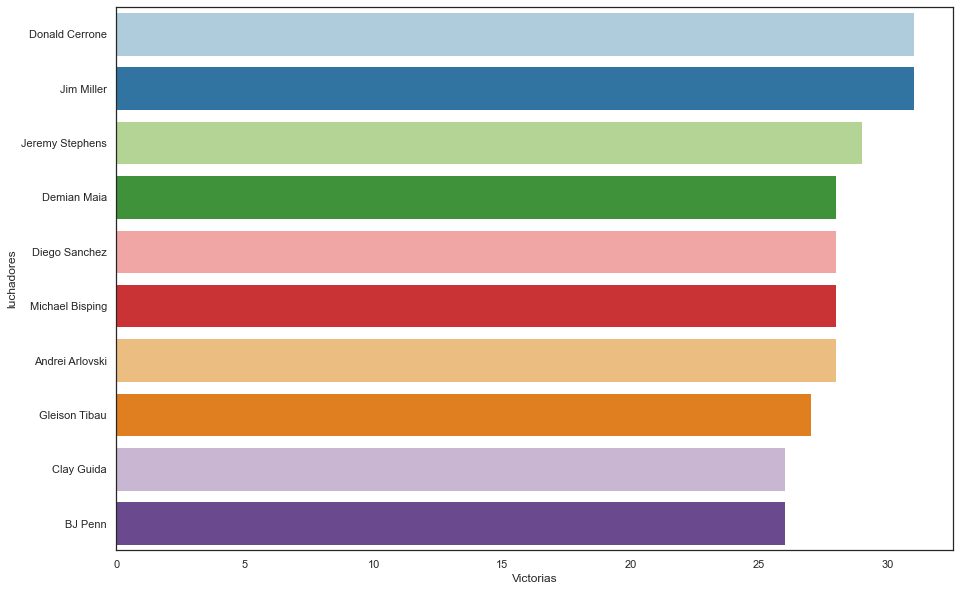

,fighter,win
0,Donald Cerrone,31
1,Jim Miller,31
2,Jeremy Stephens,29
3,Demian Maia,28
4,Diego Sanchez,28
5,Michael Bisping,28
6,Andrei Arlovski,28
7,Gleison Tibau,27
8,Clay Guida,26
9,BJ Penn,26


In [ ]:
#plotting
sns.set(style="white")
sns.set_palette("Paired")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="win", y="fighter", data=ufc_top_10)

ax.set(xlabel='Victorias', ylabel='luchadores')
plt.show()
ufc_top_10

Podemos apreciar como Donald Cerrone y Jim miller se llevan el premio a luchador con más victorias en la UFC hasta el 2019

## Respondiendo pregunta 2: ¿Como pelean los peleadores que conforman este top 10?

In [ ]:
data_agrupada2 = ufc_data.loc[:,(ufc_data.columns.str[0:4] == 'avg_') | (ufc_data.columns.str[0:2] == 'fi')]

In [ ]:
pd.set_option('display.max_rows', 30)
attacks = pd.merge(left=ufc_top_10, right=data_agrupada2, how='left', left_on='fighter', right_on='fighter')
attacks = attacks.drop(columns= 'win')
top_10_ufc_avg_attacks = attacks.groupby(attacks['fighter']).mean().reset_index()

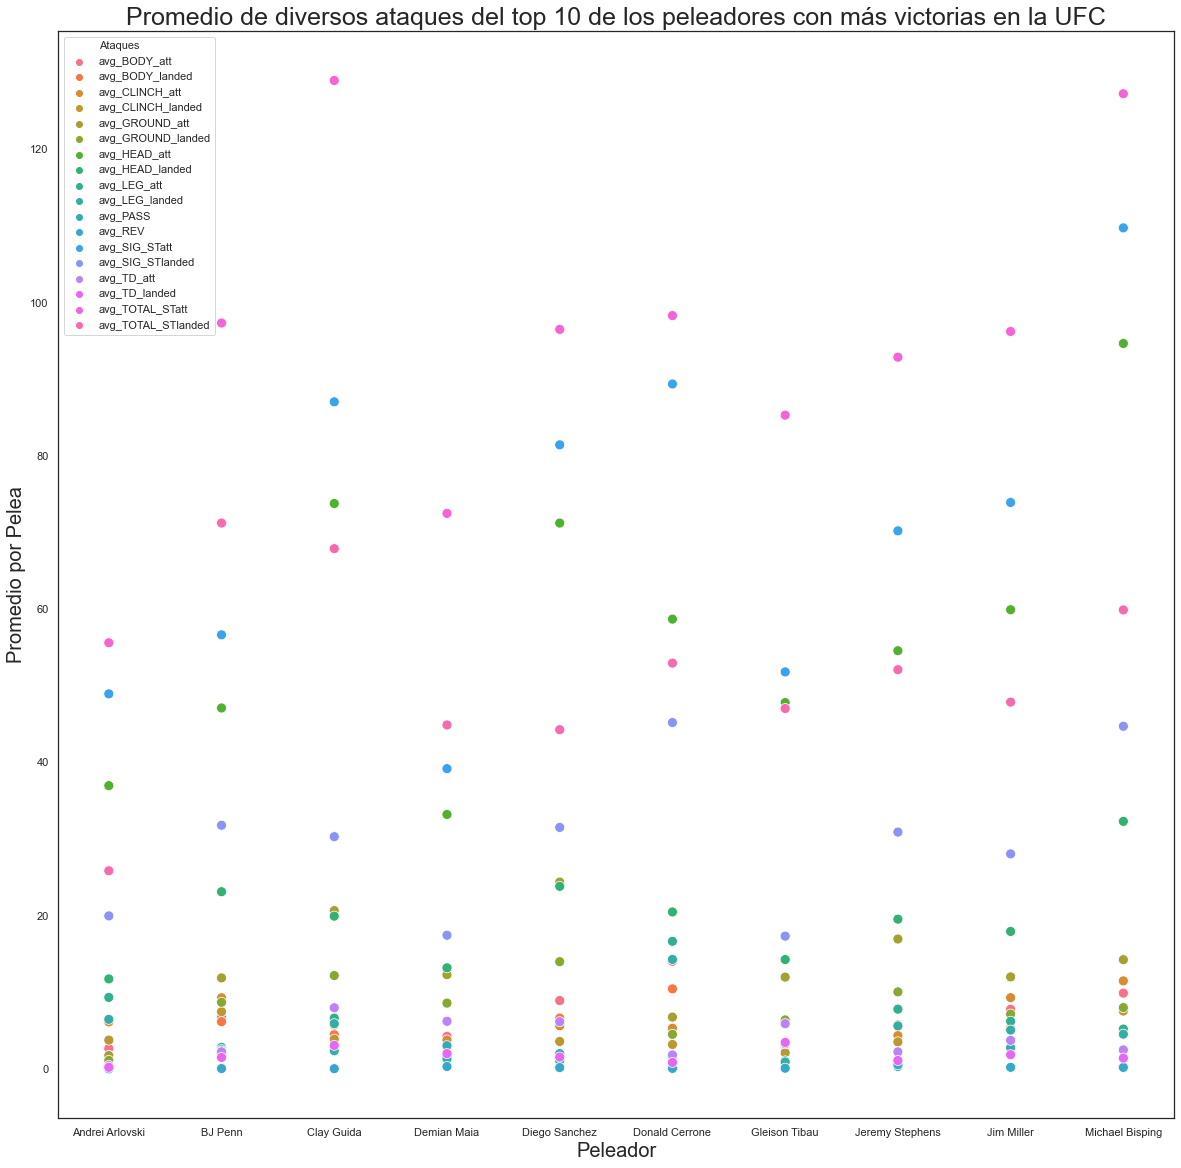

,fighter,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STatt,avg_SIG_STlanded,avg_TD_att,avg_TD_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded
0,Andrei Arlovski,2.653431,1.758860,6.130638,3.758510,1.735492,1.107827,36.954214,11.738608,9.325534,6.464981,0.147501,0.005400,48.933179,19.962449,0.444177,0.205500,55.606359,25.854034
1,BJ Penn,6.737953,6.160699,9.280541,7.468440,11.871043,8.689403,47.091842,23.117852,2.807179,2.509961,2.325909,0.039440,56.636974,31.788512,2.219881,1.500754,97.320766,71.223245
2,Clay Guida,6.643472,4.473701,5.725582,3.876972,20.650415,12.178443,73.770260,19.929443,6.625777,5.898998,2.360002,0.025934,87.039509,30.302142,7.976519,3.069191,128.970366,67.879043
3,Demian Maia,4.237196,2.923137,3.764156,2.178077,12.289854,8.582378,33.195877,13.187141,1.739317,1.329445,3.026209,0.311234,39.172390,17.439723,6.212155,1.992520,72.482560,44.872814
4,Diego Sanchez,8.909664,6.627563,5.623812,3.578197,24.372295,13.983523,71.219390,23.819784,1.298816,1.061185,1.993951,0.166262,81.427870,31.508533,6.159854,1.543911,96.491947,44.261226
5,Donald Cerrone,14.034841,10.440315,5.304434,3.188966,6.753974,4.508348,58.686543,20.472098,16.646351,14.278547,1.465736,0.061528,89.367735,45.190960,1.816128,0.842162,98.288356,52.948775
6,Gleison Tibau,2.954281,2.165392,3.214104,2.102760,11.973915,6.388103,47.790569,14.262410,1.050473,0.891888,3.283381,0.088572,51.795323,17.319689,5.897786,3.454118,85.303653,47.023260
7,Jeremy Stephens,7.849389,5.750221,4.350726,3.525273,16.945080,10.049250,54.561368,19.537111,7.791106,5.609492,0.311768,0.540633,70.201862,30.896824,2.217817,1.089415,92.863450,52.087400
8,Jim Miller,7.780245,5.053412,9.287686,5.346065,12.000740,7.149807,59.912828,17.931347,6.216240,5.063262,2.768105,0.204575,73.909313,28.048022,3.724428,1.849376,96.218402,47.858315
9,Michael Bisping,9.885620,7.883664,11.478971,7.542162,14.248908,7.993900,94.654776,32.295669,5.195371,4.531140,1.374515,0.191227,109.735766,44.710472,2.476858,1.408344,127.237765,59.882672


In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_style("whitegrid")


top_10_ufc_avg_attacks_plot = top_10_ufc_avg_attacks.melt('fighter', var_name='Ataques',  value_name='vals')
g = sns.scatterplot(x="fighter", y="vals",hue='Ataques', data=top_10_ufc_avg_attacks_plot, ax=ax, 
                    s=100)

plt.title('Promedio de diversos ataques del top 10 de los peleadores con más victorias en la UFC', fontsize=25)
plt.xlabel('Peleador', fontsize=20)
plt.ylabel('Promedio por Pelea', fontsize=20)
plt.show()
top_10_ufc_avg_attacks

Se puede observar como la mayoria de los luchadores utilizan sus habilidades ofensivas con los puños, en el mayor de los casos, para atacar la cabeza de su oponenete. Esto puede deberse a la necesidad de acabar la pelea lo más pronto posible con un Knock Out(KO) y no arriesgar sumisiones o la gran cantidad de perdida de energia que conlleva la lucha en el piso.

- avg_BODY_att = Promedio de ataques lanzados al cuerpo
- avg_BODY_landed = Promedio de golpes certeros lanzados al cuerpo 
- avg_CLINCH_att = Promedio de ataques lanzados en clinch
- avg_CLINCH_landed = Promedio de golpes certeros en el clinch
- avg_GROUND_att = Promedio de ataques lanzados en el piso
- avg_GROUND_landed = Promedio de golpes certeros lanzados en el piso
- avg_HEAD_att = Promedio de golpes lanzados a la cabeza
- avg_HEAD_landed = Promedio de golpes certeros lanzados a la cabeza
- avg_LEG_att = Promedio de patadas lanzadas
- avg_LEG_landed = Promedio de patadas certeras lanzadas
- avg_PASS = Promedio de "pase de guardia"
- avg_REV = Promedio de reversión de posición
- avg_SIG_STatt = Promedio de golpes lanzados
- avg_SIG_STlanded = Promedio de golpes significantes lanzados
- avg_TD_att = Promedio de ataque de derribo
- avg_TD_landed = Promedio de derribos certeros
- avg_TOTAL_STatt = Promedio total de golpes lanzados
- avg_TOTAL_STlanded = Promedio total de golpes certeros lanzados

## Respondiendo pregunta 3: ¿Cual es el promedio de rondas por peleador en este top 10?

In [ ]:
rondas = ufc_data[['fighter', 'no_of_rounds']]
rondas_promedio = pd.merge(left=ufc_top_10, right=rondas, how='left', left_on='fighter', right_on='fighter')
rondas_promedio= rondas_promedio.drop(columns= 'win')
rondas_promedio = rondas_promedio['no_of_rounds'].groupby(rondas_promedio['fighter']).mean().reset_index()

,fighter,no_of_rounds
0,Andrei Arlovski,3.571429
1,BJ Penn,4.000000
2,Clay Guida,3.076923
3,Demian Maia,3.428571
4,Diego Sanchez,3.071429
5,Donald Cerrone,3.451613
6,Gleison Tibau,3.000000
7,Jeremy Stephens,3.206897
8,Jim Miller,3.129032
9,Michael Bisping,3.785714


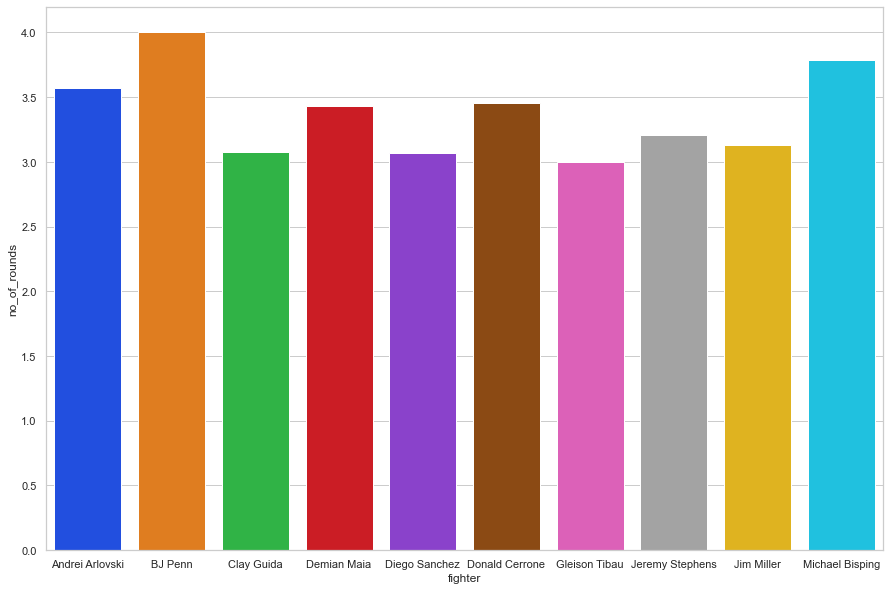

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(style="whitegrid")
sns.set_palette("bright")
ax = sns.barplot(x="fighter", y="no_of_rounds",data=rondas_promedio)
rondas_promedio

Vemos como la mayoría de estos luchadores terminan sus peleas dentro de 3 rondas.

## Respondiendo pregunta 2: ¿Que peleador ha disputado la mayor cantidad de peleas por titulo?

In [ ]:
ufc_data.loc[:,'title_bout'] = pd.Categorical(ufc_data['title_bout'])
peleas_por_titulo = ufc_data[['fighter','title_bout']]
peleas_por_titulo["title_bout"] = peleas_por_titulo["title_bout"].astype(int)
peleas_por_titulo['title_bout'].groupby(peleas_por_titulo['fighter']).sum().sort_values(ascending = False).reset_index().head(5)

C:\Users\Javier\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fighter,title_bout
0,Randy Couture,16
1,Georges St-Pierre,15
2,Demetrious Johnson,14
3,Jon Jones,13
4,Anderson Silva,13


Randy Couture se lleva el record de más peleas por titulo de la UFC

### Consideraciones:

Hubiera sido de gran interes ver de que manera estos peleadores ganan sus peleas, sin embargo muchas de las columnas las cuales se pudieron haber utilizado para este analisis no mantenian consistencia por lo cual no terminaron en el estudio.